In [1]:
import numpy as np
import math 
import sympy as sm
from matplotlib import pyplot as plt
import os
import json 
from scipy.optimize import curve_fit
pi = sm.pi
currentDir = %pwd
dataPath = os.path.join(currentDir, "entropyData.json")
plt.style.use('bmh')

In [2]:
x,L = sm.symbols('x L',positive=True)
k,n = sm.Symbol('k'), sm.Symbol('n',positive=True,integer=True)
psi = (sm.sin(n*pi*x/L)*(sm.sqrt(2/L))).subs({L:1})
psi

sqrt(2)*sin(pi*n*x)

In [3]:
phi = sm.integrate(psi*sm.exp(-sm.I*k*x),(x,0,1),conds='none')*(1/sm.sqrt(2*pi))
phi

sqrt(2)*((-1)**n*sqrt(2)*pi*n/(k**2*exp(I*k) - pi**2*n**2*exp(I*k)) - sqrt(2)*pi*n/(k**2 - pi**2*n**2))/(2*sqrt(pi))

In [4]:
positionDensity = psi*sm.conjugate(psi)
positionDensity

2*sin(pi*n*x)**2

In [5]:
momentumDensity = sm.simplify(phi*sm.conjugate(phi))
momentumDensity

-pi*n**2*((-1)**n - exp(I*k))*((-1)**n*exp(I*conjugate(k)) - 1)*exp(-I*k)/((k**2 - pi**2*n**2)*(pi**2*n**2 - conjugate(k)**2))

In [6]:
def positionalEntropy(currentN):
    integrand = (-(sm.ln(positionDensity))*positionDensity)
    return sm.Integral(integrand.subs({n:currentN}),(x,0,1)).evalf()

def momentumEntropy(currentN):
    integrand = (-(sm.ln(momentumDensity))*momentumDensity)
    return sm.Integral(integrand.subs({n:currentN}),(k,-sm.oo,sm.oo)).evalf()

In [7]:
#This will not work in a timeframe that is convenient, so look at the complimentary_Entropy notebook
#as to how I got the results for each value of entropy

In [8]:
with open(dataPath, "r") as json_file: #Always use open, so the file doesnt stay open if an error occurs
    data = json.load(json_file)

posValues = np.array(data["posValues"])
momentumValues = np.array(data["momentumValues"])
totalEntropyValues = posValues+momentumValues
nValues = np.arange(1,21,1)
#Lets get a look at them

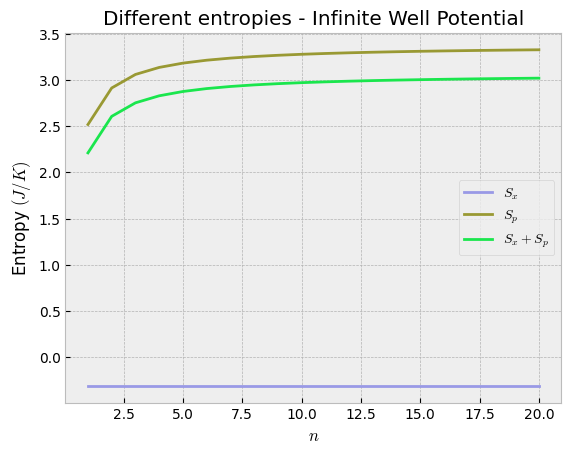

In [9]:
plt.plot(nValues,posValues,label=r'$S_x$',color=(0.6,0.6,0.9))
plt.plot(nValues,momentumValues,label=r'$S_p$',color=(0.6,0.6,0.2))
plt.plot(nValues,totalEntropyValues,label=r'$S_x+S_p$',color=(0.1,0.9,0.3))
plt.title('Different entropies - Infinite Well Potential')
plt.xlabel(r"$n$")
plt.ylabel(r"Entropy $(J/K)$")
plt.legend()
plt.show()

In [10]:
#From the looks of it, they must some exponential, so we make the fit
def fitFunc(x,a,b,c):
    return a+b*np.exp(-c*x)
xParams = curve_fit(fitFunc,nValues,posValues)[0]
pParams = curve_fit(fitFunc,nValues,momentumValues)[0]
totParams = curve_fit(fitFunc,nValues,totalEntropyValues)[0]


C:\Users\grega\AppData\Local\Temp\ipykernel_20768\3839070418.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  xParams = curve_fit(fitFunc,nValues,posValues)[0]


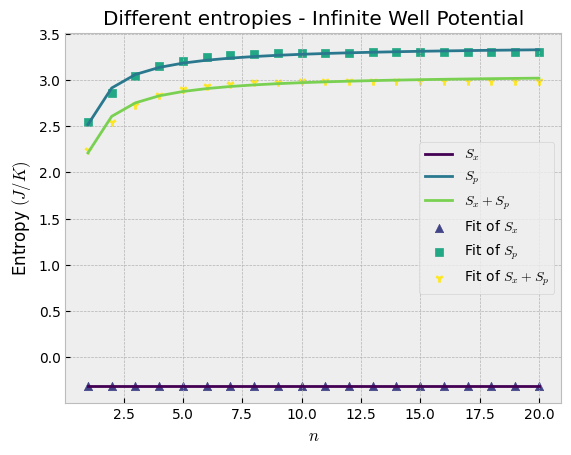

In [11]:
colorMap = plt.get_cmap('viridis', 6)
color = colorMap(0)
plt.plot(nValues,posValues,label=r'$S_x$',color = color)
color = colorMap(2)
plt.plot(nValues,momentumValues,label=r'$S_p$',color = color)
color = colorMap(4)
plt.plot(nValues,totalEntropyValues,label=r'$S_x+S_p$',color = color)
color = colorMap(1)
plt.scatter(nValues,fitFunc(nValues,*xParams),label=r'Fit of $S_x$',color = color,marker="^")
color = colorMap(3)
plt.scatter(nValues,fitFunc(nValues,*pParams),label=r'Fit of $S_p$',color = color,marker="s")
color = colorMap(5)
plt.scatter(nValues,fitFunc(nValues,*totParams),label=r'Fit of $S_x+S_p$',color = color,marker="1")
plt.title('Different entropies - Infinite Well Potential')
plt.xlabel(r"$n$")
plt.ylabel(r"Entropy $(J/K)$")
plt.legend()
plt.show()

In [12]:
#Our fit match the data nicely